In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Sheetal\Documents\Flask_project\Breast_Cancer_Prediction\BreastCancer.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
y=df["diagnosis"]
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [7]:
df.drop(["id","diagnosis"],axis=1,inplace=True)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
type(df)


pandas.core.frame.DataFrame

In [9]:

def outlier_handling(col_name):
    print(col_name)
    percentile_25=col_name.quantile(0.25)
    percentile_75=col_name.quantile(0.75)
    IQR= percentile_75- percentile_25
    upper_limit=percentile_75+1.5*IQR
    lower_limit=percentile_25-1.5*IQR
    print(upper_limit)
    print(lower_limit)
    return upper_limit,lower_limit
    


In [10]:
df_new=pd.DataFrame()
for i in df.columns:
    upper_limit,lower_limit=outlier_handling(df[i])
    df_new[i]=np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 569, dtype: float64
21.9
5.579999999999999
0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
       ...  
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: texture_mean, Length: 569, dtype: float64
30.244999999999997
7.725000000000003
0      122.80
1      132.90
2      130.00
3       77.58
4      135.10
        ...  
564    142.00
565    131.20
566    108.30
567    140.10
568     47.92
Name: perimeter_mean, Length: 569, dtype: float64
147.49499999999998
31.775000000000013
0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: area_mean, Length: 569, dtype: float64
1326.3000000000002
-123.30000000000001
0      0.11840
1      0.08474
2      0.10960
3      0.14250
4      0.10030
    

C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='radius_mean'>

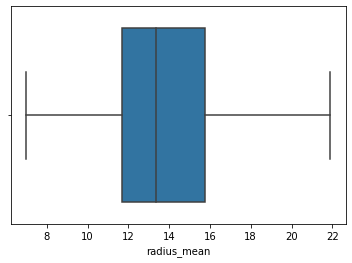

In [11]:
sns.boxplot(df_new.radius_mean)

C:\Users\Sheetal\Anaconda_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='compactness_mean'>

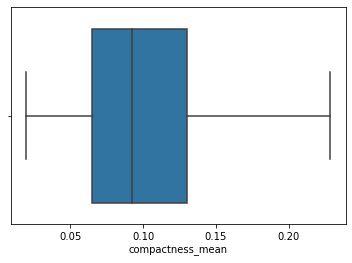

In [12]:
sns.boxplot(df_new.compactness_mean)

In [13]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [29]:
y.replace({"M":1,"B":0},inplace=True)

In [30]:
x=df_new

In [31]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=25,stratify=y)

In [33]:
x_train.shape

(426, 30)

In [34]:
y_train.value_counts(normalize=True)

0    0.626761
1    0.373239
Name: diagnosis, dtype: float64

In [35]:
y_test.value_counts()

0    90
1    53
Name: diagnosis, dtype: int64

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn=KNeighborsClassifier(n_neighbors=5)

In [38]:
model=knn.fit(x_train,y_train)

In [39]:
y_pred_test=knn.predict(x_test)

In [40]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_test))
metrics.recall_score(y_test,y_pred_test,zero_division="warn")

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        90
           1       0.98      0.87      0.92        53

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143



0.8679245283018868

In [41]:
result=[]
for k in range(1,21,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred_test=knn.predict(x_test)
    result.append([k,metrics.recall_score(y_test,y_pred_test),metrics.precision_score(y_test,y_pred_test),metrics.accuracy_score(y_test,y_pred_test)])
    
result   

[[1, 0.8301886792452831, 0.9166666666666666, 0.9090909090909091],
 [3, 0.8490566037735849, 0.9375, 0.9230769230769231],
 [5, 0.8679245283018868, 0.9787234042553191, 0.9440559440559441],
 [7, 0.8679245283018868, 1.0, 0.951048951048951],
 [9, 0.8679245283018868, 1.0, 0.951048951048951],
 [11, 0.8867924528301887, 1.0, 0.958041958041958],
 [13, 0.8679245283018868, 1.0, 0.951048951048951],
 [15, 0.8490566037735849, 1.0, 0.9440559440559441],
 [17, 0.8490566037735849, 1.0, 0.9440559440559441],
 [19, 0.8490566037735849, 1.0, 0.9440559440559441]]

In [42]:
knn=KNeighborsClassifier(n_neighbors=11)
model=knn.fit(x_train,y_train)
y_pred_test=knn.predict(x_test)
print(metrics.recall_score(y_test,y_pred_test),metrics.precision_score(y_test,y_pred_test),metrics.accuracy_score(y_test,y_pred_test))


0.8867924528301887 1.0 0.958041958041958


In [43]:
import pickle
pickle.dump(model,open("model.pkl","wb"))

In [44]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
410,11.36,17.57,72.490,399.8,0.088580,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.30,0.14530,0.16220,0.18110,0.08698,0.2973,0.07745
497,12.47,17.31,80.450,480.1,0.089280,0.07630,0.036090,0.023690,0.1526,0.06046,...,14.06,24.34,92.82,607.30,0.12760,0.25060,0.20280,0.10530,0.3035,0.07661
244,19.40,23.50,129.100,1155.0,0.102700,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.65,30.53,144.90,1417.00,0.14630,0.29680,0.34580,0.15640,0.2920,0.07614
393,21.61,22.28,144.400,1326.3,0.116700,0.20870,0.281000,0.154535,0.2162,0.06606,...,26.23,28.74,172.00,1937.05,0.15020,0.57170,0.70530,0.24220,0.3828,0.10070
279,13.85,15.18,88.990,587.4,0.095160,0.07688,0.044790,0.037110,0.2110,0.05853,...,14.98,21.74,98.37,670.00,0.11850,0.17240,0.14560,0.09993,0.2955,0.06912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,10.25,16.18,66.520,324.2,0.106100,0.11110,0.067260,0.039650,0.1743,0.07279,...,11.28,20.61,71.53,390.40,0.14020,0.23600,0.18980,0.09744,0.2608,0.09702
122,21.90,20.20,147.495,1326.3,0.133695,0.22862,0.282410,0.154535,0.2464,0.06877,...,26.02,23.99,180.90,1937.05,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
308,13.50,12.71,85.690,566.2,0.073760,0.03614,0.002758,0.004419,0.1365,0.05335,...,14.97,16.94,95.48,698.70,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192
392,15.49,19.97,102.400,744.7,0.116000,0.15620,0.189100,0.091130,0.1929,0.06744,...,21.20,29.41,142.10,1359.00,0.16810,0.39130,0.55530,0.21210,0.3187,0.10190


In [45]:
y_test

410    0
497    0
244    1
393    1
279    0
      ..
320    0
122    1
308    0
392    1
124    0
Name: diagnosis, Length: 143, dtype: int64

In [46]:
result=knn.predict([np.array([17.99,20.66,117.8,991.7,0.1036,0.1304,0.1201,0.08824,0.1992,0.06069,0.4537,0.8733,3.061,49.81,0.007231,0.02772,0.02509,0.0148,0.01414,0.003336,21.08,25.41,138.1,1349,0.1482,0.3735,0.3301,0.1974,0.306,0.08503])])

C:\Users\Sheetal\Anaconda_new\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [47]:
result

array([1], dtype=int64)